In [1]:
import pandas as pd
import numpy as np

# データの読み込み
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/gender_submission.csv')

# ランダムシードの設定
import random
np.random.seed(1234)
random.seed(1234)

In [2]:
print('train_df.shape：', train_df.shape)
print('test_df.shape：', test_df.shape)

train_df.shape： (891, 12)
test_df.shape： (418, 11)


In [3]:
# データフレームの表示行（列）の上限を設定
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived: 0=死亡、1=生存
Pclass: 1=1等席、2=2等席、3=3等席
SibSp: 乗船している兄弟や配偶者の数
Parch: 乗船している親や子供の数
Cabin: 部屋番号
Embarked: 乗船した港C=Cherbourg, Q=Queenstown, S=Southampton

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# データ型の確認
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# データの統計量を確認する
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# カテゴリ変数の確認
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
D49            1
C87            1
B42            1
C101           1
C106           1
Name: Cabin, Length: 147, dtype: int64

In [11]:
# 欠損値の数を確認
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 書式を指定
plt.style.use('ggplot')

In [14]:
# 乗船した港、生死、乗客番号を抽出
# 欠損値を除外
# 各項目で生死の数を集計
train_df[['Embarked', 'Survived', 'PassengerId']].dropna().groupby(['Embarked', 'Survived']).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [15]:
# データを横持ちに変換
embarked_df = train_df[['Embarked', 'Survived', 'PassengerId']].dropna().groupby(['Embarked', 'Survived']).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<AxesSubplot:xlabel='Embarked'>

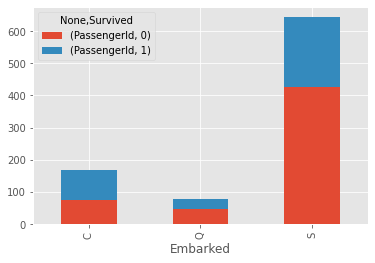

In [16]:
# 積み上げ棒グラフで表示
embarked_df.plot.bar(stacked=True)

Queenstown, Southamptonからの乗客は半数以上が死亡している。
乗船港によって乗客タイプや状態が異なる可能性がある。

In [17]:
# 各港からの乗客の死亡率を計算し追加
embarked_df['survived_rate'] = embarked_df.iloc[:, 0] / (embarked_df.iloc[:, 0] + embarked_df.iloc[:, 1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

<AxesSubplot:xlabel='Sex'>

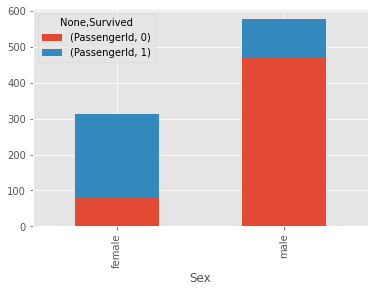

In [18]:
# 性別による生死の確認
sex_df = train_df[['Sex', 'Survived', 'PassengerId']].dropna().groupby(['Sex', 'Survived']).count().unstack()
sex_df.plot.bar(stacked=True)

<AxesSubplot:xlabel='Pclass'>

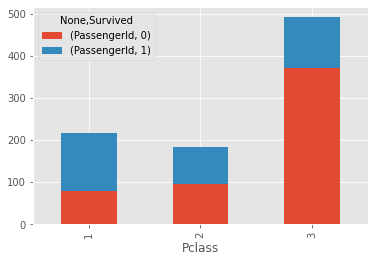

In [19]:
# チケットの階級による生死
ticket_df = train_df[['Pclass', 'Survived', 'PassengerId']].dropna().groupby(['Pclass', 'Survived']).count().unstack()
ticket_df.plot.bar(stacked=True)

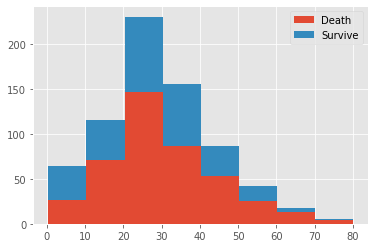

In [20]:
# 年代ごとの生死をヒストグラムで確認
plt.hist((train_df[train_df['Survived'] == 0]['Age'].values, train_df[train_df['Survived'] == 1]['Age'].values), histtype='barstacked', bins=8, label=('Death', 'Survive'))
plt.legend()

10代以下の子供は生存率が高い

In [21]:
# 性別、乗船港をダミー変数化
train_df_corr = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [22]:
# 相関係数を計算
train_corr = train_df_corr.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359


<AxesSubplot:>

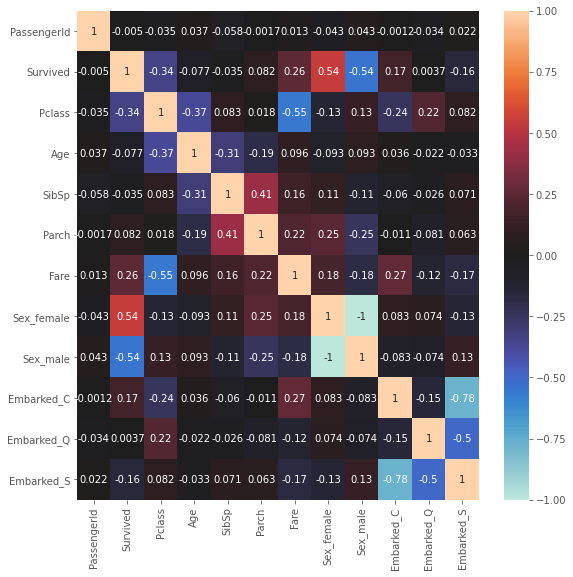

In [23]:
# 相関係数をヒートマップ化
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

In [24]:
# 学習データとテストデータの結合
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True) # drop=Trueで元の行番号を削除
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
# 欠損値の数を確認
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [26]:
# PclassごとのFareの平均値を計算
Fare_mean = all_df[['Pclass', 'Fare']].groupby('Pclass').mean().reset_index()
Fare_mean.columns = ['Pclass', 'Fare_mean']
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [27]:
# Pclassで紐づけてFare_meanを結合(onで紐づけの列を指定、howで結合位置を指定)
all_df = pd.merge(all_df, Fare_mean, on='Pclass', how='left')
# 欠損値がある（sinull=True）行に平均値を入れる
all_df.loc[(all_df['Fare'].isnull()), 'Fare'] = all_df['Fare_mean']
# 不要なFare_meanを削除
all_df = all_df.drop('Fare_mean', axis=1)

all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
all_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [29]:
# Nameを「,」と「.」で分割（数字は分割回数、expand=Trueだとデータフレームで返し、Falseだとシリーズで返す）
name_df = all_df['Name'].str.split('[,.]', 2, expand=True)
# カラム名をつける
name_df.columns = ['family_name', 'honorific', 'name']
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [30]:
# 各列に先頭末尾の空白文字を削除する
name_df['family_name'] = name_df['family_name'].str.strip()
name_df['honorific'] = name_df['honorific'].str.strip()
name_df['name'] = name_df['name'].str.strip()

In [31]:
# 敬称ごとの人数をカウント
name_df['honorific'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Dona              1
Sir               1
the Countess      1
Capt              1
Don               1
Mme               1
Lady              1
Jonkheer          1
Name: honorific, dtype: int64

In [32]:
# all_dfとname_dfを列方向に結合
all_df = pd.concat([all_df, name_df], axis=1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<AxesSubplot:xlabel='honorific', ylabel='Age'>

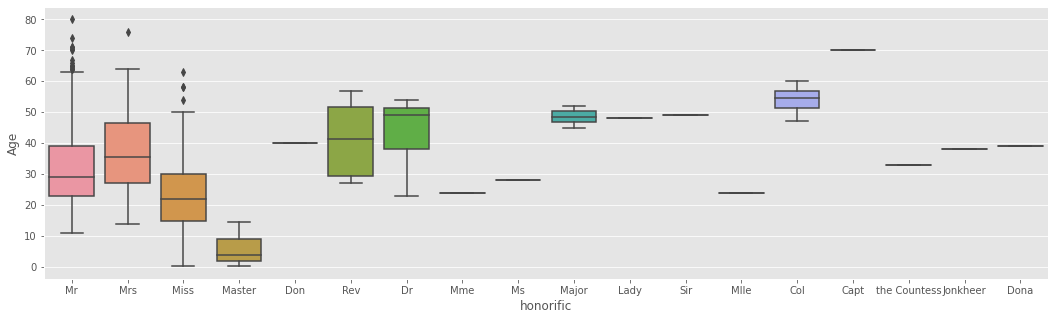

In [33]:
# 敬称ごとの年齢の分布を箱ひげ図で示す
plt.figure(figsize=(18, 5))
sns.boxplot(x='honorific', y='Age', data=all_df)

In [34]:
# 敬称ごとの平均年齢を算出
all_df[['Age', 'honorific']].groupby('honorific').mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [35]:
# train_dfにname_dfを結合(name_dfはtrainもtest含まれるため、0~len(train_df)と指定)
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
# test_dfにname_dfを結合(name_dfはtrainもtest含まれるため、len(train_df)～と指定)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)], axis=1)

<AxesSubplot:xlabel='honorific'>

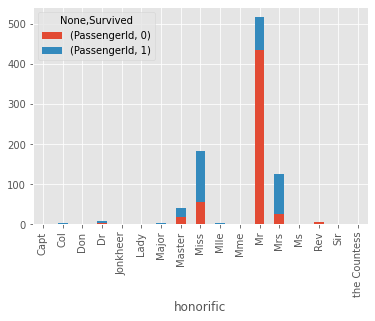

In [36]:
honorific_df = train_df[['honorific', 'Survived', 'PassengerId']].dropna().groupby(['honorific', 'Survived']).count().unstack()
honorific_df.plot.bar(stacked=True)

Mrの生存率がMissやMrsと比較して低く、Master（男子）の生存率は比較的高い

In [37]:
# 敬称ごとの平均値を計算
honorific_age_name = all_df[['honorific', 'Age']].groupby('honorific').mean().reset_index()
honorific_age_name.columns = ['honorific', 'honorific_Age']

In [38]:
# honorificに紐づけてall_dfとhonorific_dfを結合
all_df = pd.merge(all_df, honorific_age_name, on='honorific', how='left')
# Ageの欠損値の部分にhonorific_Ageの値を代入
all_df.loc[(all_df['Age'].isnull()), 'Age'] = all_df['honorific_Age']
# 不要なhonorific_Ageの列を削除
all_df = all_df.drop(['honorific_Age'], axis=1)

In [39]:
# 乗船している親子の人数と兄弟・配偶者の人数を合計して家族の人数とする
all_df['family_num'] = all_df['Parch'] + all_df['SibSp']
all_df['family_num'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

半数の人が一人で乗船していることが確認できる

In [40]:
# aloneという列を追加し、familly_numが0の行に1を代入する
all_df.loc[all_df['family_num'] == 0, 'alone'] = 1
# aloneの欠損値部分を0に置き換える。（inplace=Trueで元データを置き換える。）
all_df['alone'].fillna(0, inplace=True)

In [41]:
# 分析に不要な列を削除する
all_df = all_df.drop(['PassengerId', 'Name', 'family_name', 'name', 'Ticket', 'Cabin'], axis=1)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [42]:
# object型の列を確認
categories = all_df.columns[all_df.dtypes == 'object']
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [43]:
# 敬称がMr、Miss、Mrs、Master以外はotherでまとめる(~は否定、|はor)
all_df.loc[~((all_df['honorific'] == 'Mr') | (all_df['honorific'] == 'Miss') | (all_df['honorific'] == 'Mrs') | (all_df['honorific'] == 'Master')), 'honorific'] = 'other'
all_df['honorific'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# Embarkedの欠損値をmissingに置き換える
all_df['Embarked'].fillna('missing', inplace=True)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [46]:
le = LabelEncoder()
le = le.fit(all_df['Sex'])
all_df['Sex'] = le.transform(all_df['Sex'])

In [47]:
# 列がobject型のものをダミー変数に変換
for cat in categories:
    le = LabelEncoder()
    if all_df[cat].dtypes == 'object':
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [48]:
# Survivedがnullのものをテストデータに分割する
train_X = all_df[~all_df['Survived'].isnull()].drop('Survived', axis=1).reset_index(drop=True)
train_y = train_df['Survived']
test_X = all_df[all_df['Survived'].isnull()].drop('Survived', axis=1).reset_index(drop=True)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import lightgbm as lgb

In [99]:
# カテゴリ変数となる列をカテゴリ型に変更（warning対策）
train_X['alone'] = train_X['alone'].astype('int')
test_X['alone'] = test_X['alone'].astype('int')
train_X[['Embarked', 'Pclass', 'Sex', 'honorific', 'alone']] = train_X[['Embarked', 'Pclass', 'Sex', 'honorific', 'alone']].astype('category')
test_X[['Embarked', 'Pclass', 'Sex', 'honorific', 'alone']] = test_X[['Embarked', 'Pclass', 'Sex', 'honorific', 'alone']].astype('category')

In [61]:
# テストデータと検証用データに分割
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=0.2)

# 機械学習用のカテゴリ変数を決める
categories = ['Embarked', 'Pclass', 'Sex', 'honorific', 'alone']
# LightGBM用のtrainデータセットを準備する
lgb_train = lgb.Dataset(X_train, y_train)
# LightGBM用の検証データセットを準備する
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
# 評価基準の設定（objectiveは目的で、binary（2値分類）、regression（回帰）、multiclass（多クラス分類）から選択）
lgbm_params = {'objective': 'binary', 'random_seed': 1234}

# 機械学習の実施
# num_boost_roundは学習回数、early_stopping_roundsは設定回数連続で失敗した場合学習を止める指定、verbose_evalは学習結果の表示頻度
model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, early_stopping_rounds=20, verbose_eval=10)

[LightGBM] [Info] Number of positive: 278, number of negative: 434
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390449 -> initscore=-0.445423
[LightGBM] [Info] Start training from score -0.445423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [62]:
# 各変数の重要度を算出
model_lgb.feature_importance()

array([ 72,  34, 455,  20,   8, 486,  66,  10,  57,   8])

<AxesSubplot:>

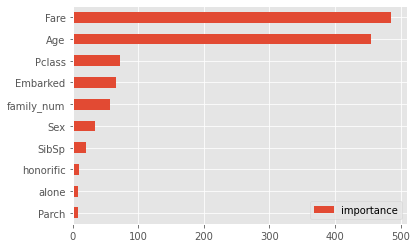

In [63]:
# 重要度のグラフ化
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=True)
importance.plot.barh()

Fare、Age、Pclassが重要な変数だと判明
小さい子供や上客が優先的に助けられていた可能性がある

In [64]:
# 最も精度が高かった時の学習モデル（.best_interaction）で予測
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

# 正解率の計算
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, np.round(y_pred))

0.8156424581005587

In [67]:
# ハイパーパラメーターの変更
# max_binは1つの分岐に入るデータの最大値、num_leavesは1つの木に含まれる葉の最大数、min_data_in_leafは1つの葉における最小のデータ数
lgbm_params = {'objective': 'binary', 'max_bin':331, 'num_leaves':20, 'min_data_in_leaf':57, 'random_seed':1234}
# 再度LightGBMのデータセットを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

# 再度機械学習の実施
model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, early_stopping_rounds=20, verbose_eval=10)

[LightGBM] [Info] Number of positive: 278, number of negative: 434
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390449 -> initscore=-0.445423
[LightGBM] [Info] Start training from score -0.445423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [56]:
# 正解率の再計算
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

In [68]:
# 分割数を設定
folds = 3
# クロスバリデーションの設定
kf = KFold(n_splits=folds)

In [94]:
# 学習したデータモデルを入れる空リストを作成
models = []
# クロスバリデーションによる学習
for train_index, val_index in kf.split(train_X):
    # 楽手データと検証データに分割
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_y.iloc[train_index]
    y_valid = train_y.iloc[val_index]

    # Lightgbm用のデータセットを作成
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    # LightGBMにて機械学習を実施
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100, early_stopping_rounds=20, verbose_eval=10)

    #  X_validでの検証
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    # 正解率を算出し表示
    print(accuracy_score(y_valid, np.round(y_pred)))
    # 各学習モデルをリストに入れる
    models.append(model_lgb)

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\r-swx\Anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\r-swx\Anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
C:\Users\r-swx\Anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\r-swx\Anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
C:\Users\r-swx\Anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('O

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360269 -> initscore=-0.574195
[LightGBM] [Info] Start training from score -0.574195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's binary_logloss: 0.482153
[LightGBM] [War

In [100]:
# 予測値データを入れる空リストを作成
preds = []

# 各モデルでの予測値を計算
for model in models:
    pred = model.predict(test_X)
    preds.append(pred)
    
# Numpyで扱える形式に変換
preds_array = np.array(preds)
# 結果の平均をとる（axis=1だと各モデル内の平均値となる）
preds_mean = np.mean(preds_array, axis=0)
# 
pred_int = (preds_mean > 0.5).astype(int)

In [106]:
submission['Survived'] = pred_int
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
# CSVファイルとして結果を出力
submission.to_csv('./submit/taitanic_submit01.csv', index=False)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 別の分析のためのデータの再読み込み
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [3]:
# 各チケットクラスの数を確認
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:>

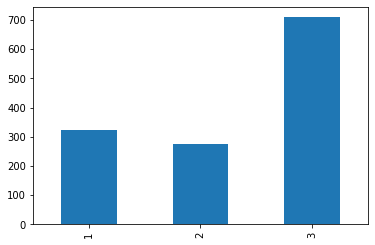

In [4]:
all_df.Pclass.value_counts().plot.bar()

In [5]:
# チケットクラスごとの平均や標準偏差
all_df[['Pclass', 'Fare']].groupby('Pclass').describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

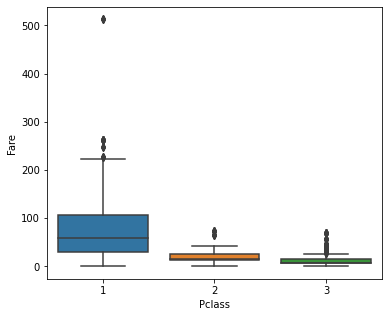

In [6]:
# チケットクラスごとのFareの箱ひげ図を作成
plt.figure(figsize=(6, 5))
sns.boxplot(x='Pclass', y='Fare', data=all_df)

In [7]:
# 1級の中でもハイクラスの人をPclass0として集計
all_df['Pclass2'] = all_df['Pclass']
# 上位75%の108以上をクラス0と設定
all_df.loc[all_df['Fare'] > 108, 'Pclass2'] = 0
all_df[all_df['Pclass2'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


In [8]:
# チケットクラスごとの年齢分布の確認
all_df[['Pclass2', 'Age']].groupby('Pclass2').describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

<AxesSubplot:xlabel='Pclass2', ylabel='Age'>

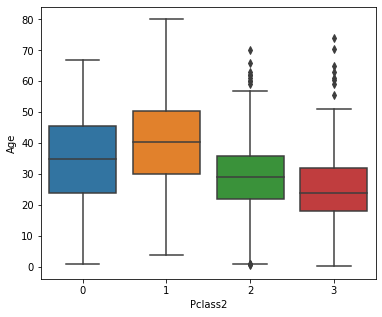

In [9]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Pclass2', y='Age', data=all_df)

In [10]:
# 子供の年齢を除外するために15歳以上に設定
all_df[all_df['Age'] > 15][['Pclass2', 'Age']].groupby('Pclass2').describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Pclass2                                                           
0         69.0  37.920290  13.428357  17.0  27.0  36.0  48.0  67.0
1        207.0  40.768116  13.780416  16.0  30.0  41.0  50.5  80.0
2        233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3        422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

<AxesSubplot:xlabel='Pclass2', ylabel='Age'>

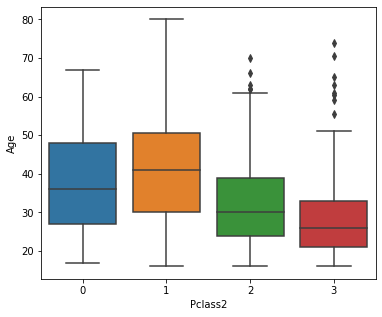

In [11]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Pclass2', y='Age', data=all_df[all_df['Age'] > 15])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

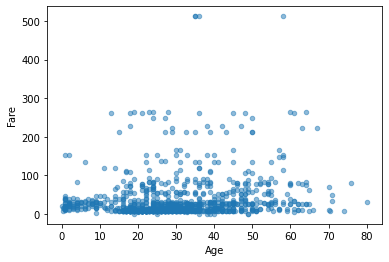

In [12]:
all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)

In [13]:
# クラスごとの乗船している家族の人数を確認
all_df['family_num'] = all_df['SibSp'] + all_df['Parch']
all_df[['Pclass2', 'family_num']].groupby('Pclass2').describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

<AxesSubplot:xlabel='Pclass2', ylabel='family_num'>

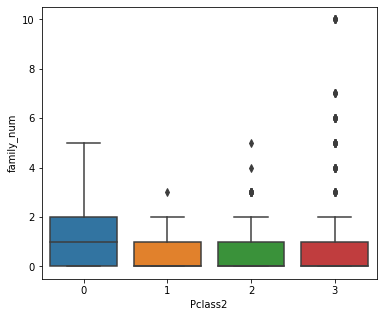

In [14]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Pclass2', y='family_num', data=all_df)

<AxesSubplot:xlabel='Pclass2'>

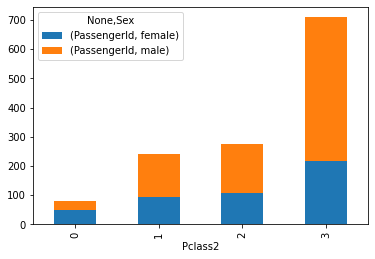

In [16]:
# クラスごとの男女比を確認
Pclass_gender_df = all_df[['Pclass2', 'Sex', 'PassengerId']].dropna().groupby(['Pclass2', 'Sex']).count().unstack()
Pclass_gender_df.plot.bar(stacked=True)

In [24]:
# 男性比率を算出し、表に追加
Pclass_gender_df['male_ratio'] = Pclass_gender_df['PassengerId', 'male'] / (Pclass_gender_df['PassengerId', 'male'] + Pclass_gender_df['PassengerId', 'female'])
Pclass_gender_df

PassengerId      male_ratio
Sex          female male           
Pclass2                            
0                51   30   0.370370
1                93  149   0.615702
2               106  171   0.617329
3               216  493   0.695346

クラス0では同伴者が多いため、女性の比率も高くなっていると考えられる。

<AxesSubplot:xlabel='Pclass2'>

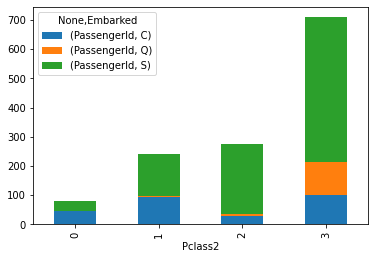

In [30]:
# 港ごとのクラスの割合を確認
Pclass_emb_df = all_df[['Pclass2', 'Embarked', 'PassengerId']].dropna().groupby(['Pclass2', 'Embarked']).count().unstack()
Pclass_emb_df = Pclass_emb_df.fillna(0)
Pclass_emb_df.plot.bar(stacked=True)

In [49]:
# 100%積み上げ棒グラフに変更
Pclass_emb_df_ratio = Pclass_emb_df.copy()
# 各列の割合を算出し、代入する
Pclass_emb_df_ratio['sum'] = Pclass_emb_df['PassengerId', 'C'] + Pclass_emb_df['PassengerId', 'Q'] + Pclass_emb_df['PassengerId', 'S']
Pclass_emb_df_ratio['PassengerId', 'C'] = Pclass_emb_df_ratio['PassengerId', 'C'] / Pclass_emb_df_ratio['sum']
Pclass_emb_df_ratio['PassengerId', 'Q'] = Pclass_emb_df_ratio['PassengerId', 'Q'] / Pclass_emb_df_ratio['sum']
Pclass_emb_df_ratio['PassengerId', 'S'] = Pclass_emb_df_ratio['PassengerId', 'S'] / Pclass_emb_df_ratio['sum']
# 不要になったsumの列を削除
Pclass_emb_df_ratio = Pclass_emb_df_ratio.drop(['sum'], axis=1)

Pclass_emb_df_ratio

PassengerId                    
Embarked           C         Q         S
Pclass2                                 
0           0.580247  0.000000  0.419753
1           0.391667  0.012500  0.595833
2           0.101083  0.025271  0.873646
3           0.142454  0.159379  0.698166

<AxesSubplot:xlabel='Pclass2'>

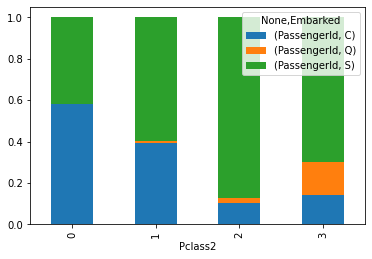

In [50]:
# 積み上げ棒グラフを作成
Pclass_emb_df_ratio.plot.bar(stacked=True)

In [58]:
# ハイクラスのチケットの人は港Cから乗船していることが多いため、港Cから1人で乗船した若者をピックアップして調査する。
C_young10 = all_df[(all_df['Embarked'] == 'C') & (all_df['Age'] // 10 == 1) & (all_df['family_num'] == 0)]
C_young20 = all_df[(all_df['Embarked'] == 'C') & (all_df['Age'] // 10 == 2) & (all_df['family_num'] == 0)]

print('C_young10:', len(C_young10))
print('C_young20:', len(C_young20))

C_young10: 7
C_young20: 31


<AxesSubplot:xlabel='Age', ylabel='Fare'>

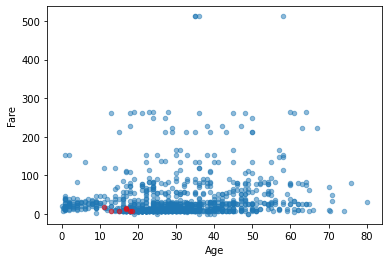

In [60]:
ax = all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young10.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

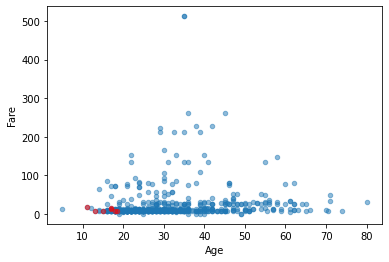

In [61]:
# 一人乗船の中での港Cからの乗船した人
ax = all_df[all_df['family_num'] == 0].plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young10.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

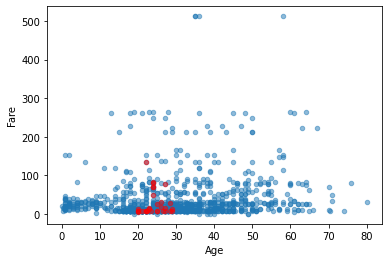

In [62]:
ax = all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young20.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

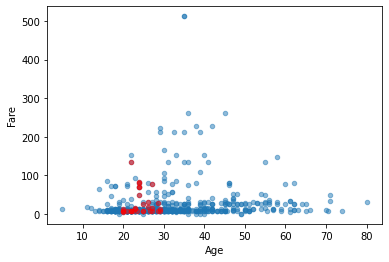

In [63]:
ax = all_df[all_df['family_num'] == 0].plot.scatter(x='Age', y='Fare', alpha=0.5)
C_young20.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

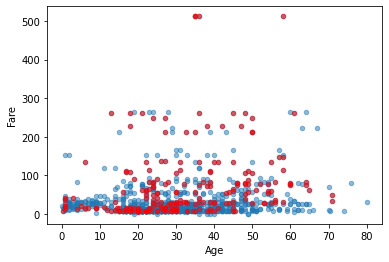

In [68]:
# 全体の中の港Cから乗船した人の年齢・乗船料金を確認
C_all = all_df[all_df['Embarked'] == 'C']
ax = all_df.plot.scatter(x='Age', y='Fare', alpha=0.5)
C_all.plot.scatter(x='Age', y='Fare', color='red', alpha=0.5, ax=ax)

In [72]:
# 各乗船港ごとに10代1人乗船客の平均料金を比較
all_df[(all_df['Age'] // 10 == 1) & (all_df['family_num'] == 0)][['Embarked', 'Fare']].groupby('Embarked').mean()

,Fare
Embarked,
C,10.594057
Q,7.531944
S,16.218712
